# Vectors BEGINNER

Esta tabla contiene la información de las expresiones del tipo vector (Listas, diccionarios, etc) EXPERT.  --> ABEL COMPLETAR <--

## 1 - Obtencion de datos

In [5]:
import matplotlib.pyplot as plt
from notebooks_utils import *

TARGET_FEATURE = 'vector__expertise_level'
TARGET_CLASS = 'BEGINNER'
full_table = get_data('vectors')

instances_for_class_low = len(full_table[full_table[TARGET_FEATURE] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TARGET_FEATURE] == "EXPERT"])

print(f"The dataset contains {instances_for_class_low} ({instances_for_class_low/len(full_table)*100:.4}%) instances for BEGINNER class and {instances_for_class_high} ({instances_for_class_high/len(full_table)*100:.4}%) for EXPERT class.")

2024-05-27 12:50:17.363717 Data cache files found ...
2024-05-27 12:50:17.504390 Data cache files successfully loaded!!
The dataset contains 120930 (34.83%) instances for BEGINNER class and 226267 (65.17%) for EXPERT class.


In [6]:
full_table = full_table[full_table[TARGET_FEATURE] == TARGET_CLASS]

# Table name, features and target.
TABLE_NAME = 'vectors'
TABLE_FEATURES = ['vector__category', 'vector__number_of_elements', 'vector__homogeneous']

# Load features and target.
X = full_table[TABLE_FEATURES]

# Print information about the loaded table.
print(f'Features shape: {X.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. Each of the instances corresponds to a program. For each program we have {X.shape[1]} attributes.')

Features shape: (120930, 3)
As we can see the downloaded data contains a total of 120930 instances. Each of the instances corresponds to a program. For each program we have 3 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [7]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 120930 entries, 0 to 120929
Data columns (total 3 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   vector__category            120930 non-null  object
 1   vector__number_of_elements  120930 non-null  int64 
 2   vector__homogeneous         120930 non-null  bool  
dtypes: bool(1), int64(1), object(1)
memory usage: 2.9+ MB
None


Cómo podemos ver la tabla está compuesta por 1 variable numérica, 2 variables boleanas y 1 de tipo objeto. Una de las últimas variables es la etiqueta de la instancia. Sin embargo, en algunas ocasiones estas últimas clases no las vamos a utilizar. Por ejemplo, si queremos obtener clusters por medio de aprendizaje no supervisado.

### 2.1 - Duplicados
Miramos si la tabla tiene entradas duplicadas.

In [8]:
number_of_duplicated_entries = sum(full_table.duplicated(subset=TABLE_FEATURES))
duplicated_entries_pct = number_of_duplicated_entries / len(full_table) * 100
print(f"The dataset contains [{duplicated_entries_pct:.4}%] of duplicated entries.")

The dataset contains [99.82%] of duplicated entries.


### 2.3 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [9]:
X.isnull().sum()

vector__category              0
vector__number_of_elements    0
vector__homogeneous           0
dtype: int64

In [10]:
print_empty_cols(X)

vector__category
----------------
0 instancias no tienen un valor para la columna vector__category


vector__number_of_elements
--------------------------
0 instancias no tienen un valor para la columna vector__number_of_elements


vector__homogeneous
-------------------
0 instancias no tienen un valor para la columna vector__homogeneous




### 2.4 - Describimos los valores de las variables de la tabla.

In [11]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vector__category,120930,4,TupleLiteral,87817,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vector__number_of_elements,120930.0,NaN,NaN,NaN,6.338386,73.321813,0.0,2.0,2.0,3.0,5376.0
vector__homogeneous,120930,2,False,90788,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesario ver la distribucion de lo valores para hacer los bins (categorias).

In [12]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "vector__number_of_elements": [(0.0, 2.0), (2.0, 2.0), (2.0, 3.0), (3.0, inf)], # min: 0 ; max: 14519
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['vector__number_of_elements'], 10))
print(get_statistics(full_table, ['vector__category'], 10))
print(get_statistics(X_copy, ['vector__homogeneous'], 10))

# 2 FEATURES
print("--- TWO FEATURES ---")
#print(get_statistics(X_copy, ['variable__is_magic', 'variable__name_convention_Discard'], 10))
#print(get_statistics(X_copy, ['functiondef__number_of_characters', 'functiondef__name_convention_Lower'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
#print(get_statistics(X_copy, ['module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct'], 10))

--- SINGLE FEATURE ---
vector__number_of_elements  count  percentage
                 [3.0_inf]  56154   46.435128
                 [2.0_2.0]  45792   37.866534
                 [0.0_2.0)  18984   15.698338

 vector__category  count  percentage
     TupleLiteral  87817   72.618043
      ListLiteral  23034   19.047383
DictionaryLiteral   9678    8.002977
       SetLiteral    401    0.331597

 vector__homogeneous  count  percentage
               False  90788   75.074837
                True  30142   24.925163

--- TWO FEATURES ---
--- THREE FEATURES ---


In [13]:
def normalize_datatypes(X:pd.DataFrame) -> (pd.DataFrame, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')        
    columns_names = X.columns.tolist()
    return X, columns_names

X, TABLE_FEATURES = normalize_datatypes(X)
# Print information about the loaded table
print(f'Features shape: {X.shape}')

Features shape: (120930, 6)


#### Muestra la matriz de correlación de pearson entre las variables de la tabla.

<Axes: >

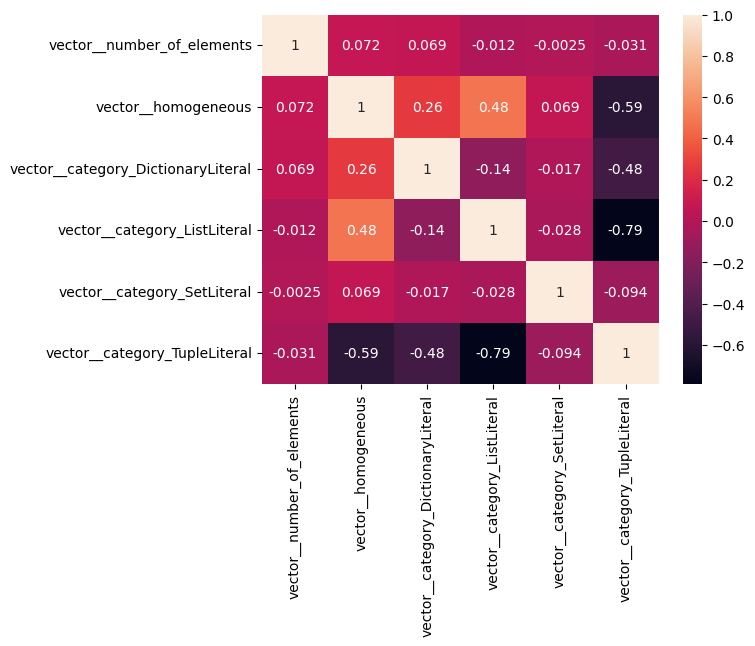

In [14]:
sns.heatmap(X.corr(), annot=True)

## 3 - Detección de valores atípicos (outliers)
Una vez sabemos qué datos contiene la tabla, analizaremos los valores que toma cada una de las variables de cada instancia. El objetivo es identificar posibles valores atípicos que nos dificulten la realización de futuras tareas. 
Tras su análisis, se puede concluir que un valor:
    - **Es erróneo**. En este caso hay que tomar una decisión para cada caso, siendo los tratamientos más extendidos son listwise, pairwise, drop variables, mean/median imputation, most frequent, separate category, zero imputation, cold deck, hot deck,(stochastic) regression, k-NN and multiple imputation. Los resultados de imputación regresiva, k-NN y múltiple dan buenos resultados, aunque, como se ha indicado, es necesario el estudio en cada caso.
    - **Es correcto, pero anómalo**. Se documenta su existencia para su posible discusión y se mantiene en el dataset. En estos casos se hace necesaria la utilización de algoritmos y estadísticos que no sean muy sensibles a dichos valores anómalos.

## Univariate
Para cada uno de los atributos se debe realizar un análisis y detección de valores atípicos, estudiando su posible causa. 
Existen diversas formas de calcular los valores anómalos. 

### Variables numéricas
Para las variables numéricas, se suele identificar: 
    - a) Valor atípico leve es el que está fuera de $[Q1 - 1.5IQR, Q3 + 1.5IQR]$, donde $IQR = Q3-Q1$.
    - b) Valor atípico extremo está fuera de $[Q1 - 3IQR, Q3 + 3IQR]$.

La idea es probar con a) y si hay pocas instancias analizarlas. Si hubiese muchas, mirar b) y analizar si fuesen pocas. No hay un algoritmo o método estipulado, puesto que depende del dominio del problema y de los datos.

Los límites de Tukey se basan en los cuartiles de los datos y son sensibles a la presencia de sesgo en la distribución. Cuando hay asimetría en los datos, los límites de Tukey pueden no ser tan efectivos para identificar outliers de manera equitativa en ambos extremos de la distribución. El Coeficiente de Medcouple es útil para identificar la asimetría en los datos, especialmente en presencia de valores atípicos o sesgados. Es una medida robusta porque no se ve tan afectada por valores extremos como la media y la desviación estándar. El MC puede proporcionar información adicional sobre la asimetría de la distribución, lo que te permite ajustar los límites de Tukey de manera más apropiada para tu conjunto de datos específico. Una posible variacion de los límites de Tukey teniendo en cuenta MC podria ser: 
   - Si MC es mayor que 0 (asimetría hacia la derecha):
      - low = (q1-1.5 * math.exp(-4*mc) * iqr)
      - high = (q3+1.5 * math.exp(3.5*mc) * iqr)
   - Si la asimetriza es hacia la izquierda:    
      - low = (q1-1.5 * math.exp(-3.5*mc) * iqr)
      - high = (q3+1.5 * math.exp(4*mc) * iqr)


### Variables categóricas
Para las variables categóricas no existe el concepto de valor anómalo, pero sí se puede considerar en base a un análisis de frecuencia. Por ejemplo, que el uso de una categoría sea residual, pudiendo tener un 0.1% de instancias en el dataset. Para detectar estos valores, se puede fijar un valor mínimo de frecuencia en función del número posible de valores de la variable categórica (2 en el caso de una variable booleana). Por ejemplo, un umbral de $\frac{0.2\%}{valores}$ (0.1% en el caso de una variable booleana)

## Analisis detallado de variables
Para cada una de las 10 variable (3 booleanas, 4 porcentuales y 3 numericas) se hara un analisis detallado 

### Variable homogeneous (1/3)
Esta variable es de tipo booleano y representa si todos los elementos de la lista son del mismo tipo.

<Axes: xlabel='vector__homogeneous', ylabel='Count'>

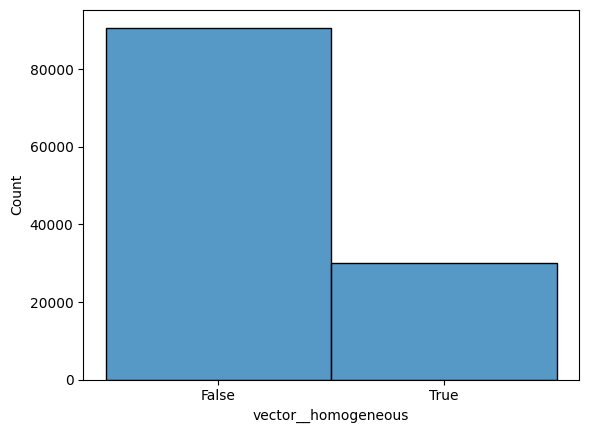

In [15]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['vector__homogeneous'], discrete=True)

In [16]:
num_true_values = len(X[X['vector__homogeneous'] == True])
num_false_values = len(X[X['vector__homogeneous'] == False])
std = X['vector__homogeneous'].std()
freq_true = len(X[X['vector__homogeneous'] == True]) / len(X['vector__homogeneous'])
freq_false = len(X[X['vector__homogeneous'] == False]) / len(X['vector__homogeneous'])
print(f'La variable homogeneous contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable homogeneous a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable homogeneous a False es {freq_false}.')

La variable homogeneous contiene 30142 valores verdaderos y 90788 valores falsos. Y, la desviación típica es de 0.4325815737247467
La frecuencia con la que programa puede tener la variable homogeneous a True es 0.24925163317621765.
La frecuencia con la que programa puede tener la variable homogeneous a False es 0.7507483668237823.


In [17]:
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'vector__homogeneous', possible_values)

La variable vector__homogeneous contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable vector__homogeneous toma el valor de 0.0 en un 75.07% de los items.
La variable vector__homogeneous toma el valor de 1.0 en un 24.93% de los items.


In [18]:
X[X['vector__homogeneous'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])


,vector__number_of_elements,vector__homogeneous,vector__category_DictionaryLiteral,vector__category_ListLiteral,vector__category_SetLiteral,vector__category_TupleLiteral
count,30142.000000,30142.0,30142.000000,30142.000000,30142.000000,30142.000000
mean,15.495223,1.0,0.202873,0.517948,0.010218,0.268960
std,145.738876,0.0,0.402145,0.499686,0.100569,0.443427
min,0.000000,1.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.0,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.0,0.000000,1.000000,0.000000,0.000000
75%,4.000000,1.0,0.000000,1.000000,0.000000,1.000000
max,5376.000000,1.0,1.000000,1.000000,1.000000,1.000000


### Variable number_of_elements (2/3)
Esta variable representa el número de elementos en la lista. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 14519. Con una media de 4.406.

<Axes: ylabel='vector__number_of_elements'>

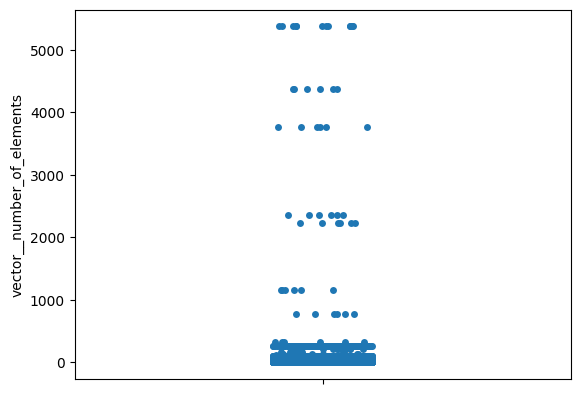

In [19]:
sns.stripplot(X['vector__number_of_elements'])

In [20]:
print_outliers_for_df_column(X, 'vector__number_of_elements')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9753949850907153
Rango valores atípicos extremos (Tukey): [-1.0,6.0]
Rango valores atípicos leves (Tukey): [0.5,4.5]
Rango valores atípicos extremos (Fixed BoxPlot): [1.9506302474910897,77.22084558129575]
-3.0IQR: 0 instancias tienen un valor para vector__number_of_elements inferior a -1.0 (Q1-3*IQR) para vector__number_of_elements. Representando un 0.0% del total de instancias.
-1.5IQR: 12228 instancias tienen un valor para vector__number_of_elements inferior a 0.5 (Q1-1.5*IQR) para vector__number_of_elements. Representando un 10.11% del total de instancias.
+1.5IQR: 10198 instancias tienen un valor para vector__number_of_elements superior a 4.5 (Q3+1.5*IQR) para vector__number_of_elements. Representando un 8.433% del total de instancias.
+3.0IQR: 7168 instancias tienen un valor para vector__number_of_elements superior a 6.0 (Q3-3*IQR) para vector__number_of_elements. Representando un 5.927% del total de instancias.
L: 18984 

In [21]:
X[X['vector__number_of_elements'] > 81].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,vector__number_of_elements,vector__homogeneous,vector__category_DictionaryLiteral,vector__category_ListLiteral,vector__category_SetLiteral,vector__category_TupleLiteral
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.0,1260.000000
mean,235.261108,0.599206,0.090476,0.395238,0.0,0.514286
std,674.550964,0.490254,0.286977,0.489096,0.0,0.499994
min,83.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,83.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,100.000000,1.000000,0.000000,0.000000,0.0,1.000000
75%,100.000000,1.000000,0.000000,1.000000,0.0,1.000000
max,5376.000000,1.000000,1.000000,1.000000,0.0,1.000000


### Variable category (3/3)
Esta variable es de tipo categorica y representa el tipo del vector.

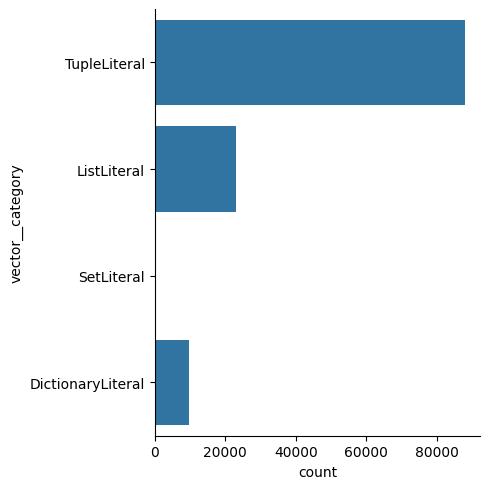

In [22]:
sns.catplot(full_table['vector__category'], kind="count")

In [23]:
print_frequency_anal_for_cat_var(full_table, 'vector__category')

La variable vector__category contiene 4 valores distintos.
El umbral de outlier es de 0.05%
La variable vector__category toma el valor de TupleLiteral en un 72.62% de los items.
La variable vector__category toma el valor de ListLiteral en un 19.05% de los items.
La variable vector__category toma el valor de DictionaryLiteral en un 8.003% de los items.
La variable vector__category toma el valor de SetLiteral en un 0.3316% de los items.
